# **Analyzing the features that impact on Developer Salaries Using Machine Learning - Project Data Science Blog**

Author: Carolina Barros

### Table of Contents
1. [Introduction & Objective](#1-introduction--objective)
2. [Importing Libraries](#2-importing-libraries)
3. [Loading the Dataset](#3-loading-the-dataset)
4. [Data Cleaning & Preprocessing](#4-data-cleaning--preprocessing)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
6. [Feature Engineering](#6-feature-engineering-if-applicable)
7. [Splitting Data into Training & Testing Sets](#7-splitting-data-into-training--testing-sets)
8. [Model Training](#8-model-training)
9. [Model Performance Metrics](#9-model-performance-metrics)
10. [Conclusion & Future Work](#10-conclusion--future-work)


### 1. Introduction & Objective
This notebook explores the **2024 Stack Overflow Developer Survey** dataset using the **CRISP-DM methodology**.  

The primary objective of this project is to **analyze the impact of various factors on developer salaries**. These factors include:  
- **Education level**  
- **Country/Continent**  
- **Work experience**  
- **Technology stack (e.g., programming languages, platforms used)**  
- **Organization size**  
- **Other relevant variables**  

In addition to identifying key salary influencers, this project aims to **build and evaluate predictive models**—specifically, **Linear Regression** and **Random Forest**—to better understand salary trends and enhance salary predictions for developers. 

### 2. Importing Libraries

In [1]:
# Required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### 3. Loading the Dataset

In [2]:
# Load the dataset that was prepared in the data_preparation notebook.
df = pd.read_csv("../data/dataset.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display first few rows
df.head()

,ResponseId,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,WorkExp,Industry,JobSat,ConvertedCompYearly
0,73,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",1,Data scientist or machine learning specialist,100 to 499 employees,Pakistan,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,3.0,Software Development,10.0,7322.0
1,380,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist,20 to 99 employees,Turkey,JavaScript;Julia;Python;SQL;TypeScript,DuckDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Cloudflare;Digital O...,Next.js;React;Vue.js,7.0,Computer Systems Design and Services,10.0,91295.0
2,390,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7,Student,10 to 19 employees,United States of America,HTML/CSS;JavaScript;Python;SQL;TypeScript,IBM DB2;MySQL;SQLite,Amazon Web Services (AWS),FastAPI;Flask;Node.js;Vue.js,8.0,"Transportation, or Supply Chain",10.0,110000.0
3,393,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,Engineering manager,"1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,BigQuery;Oracle;PostgreSQL,Amazon Web Services (AWS),React,18.0,Retail and Consumer Services,7.0,161044.0
4,399,45-54 years old,"Employed, full-time",Remote,Some college/university study without earning ...,30,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,Microsoft Azure,Angular;ASP.NET CORE;React,30.0,Healthcare,5.0,195000.0


In [3]:
# Initial Data Exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              10137 non-null  int64  
 1   Age                     10137 non-null  object 
 2   Employment              10137 non-null  object 
 3   RemoteWork              10137 non-null  object 
 4   EdLevel                 10137 non-null  object 
 5   YearsCodePro            10137 non-null  object 
 6   DevType                 10137 non-null  object 
 7   OrgSize                 10137 non-null  object 
 8   Country                 10137 non-null  object 
 9   LanguageHaveWorkedWith  10137 non-null  object 
 10  DatabaseHaveWorkedWith  10137 non-null  object 
 11  PlatformHaveWorkedWith  10137 non-null  object 
 12  WebframeHaveWorkedWith  10137 non-null  object 
 13  WorkExp                 10137 non-null  float64
 14  Industry                10137 non-null

The dataset consists of **10,137 observations** and **14 features**, including:  

- **1 ID variable**: `Response ID`  
- **1 target variable**: `ConvertedCompYearly` (annual compensation in USD)  
- **2 numeric variables**:  
  - Work experience  
  - Job satisfaction  
- **12 categorical variables**  

The target variable, `ConvertedCompYearly`, is a continuous variable representing annual salary in U.S. dollars.


### 4. Data Cleaning & Preprocessing

In [4]:
# Check unique values of Employement column
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, part-time;Employed, part-time',
       'Employed, full-time;Not employed, but looking for work',
       'Employed, full-time;Employed, part-time'

In [5]:
# Filter rows where 'employment_status' contains 'Employed, full-time'  
# I think analyzing only full-time employees could provide more accurate salary insights.
df = df[df['Employment'].str.contains('Employed, full-time', na=False)]

In [6]:
# Drop 'Employement' column
df = df.drop(['Employment'], axis=1)

In [7]:
# Check unique values in the 'DevType' variable to determine the number of job categories.
df['DevType'].value_counts()

DevType
Developer, full-stack                            4029
Developer, back-end                              2171
Developer, front-end                              441
Engineering manager                               302
Developer, desktop or enterprise applications     243
Other (please specify):                           236
DevOps specialist                                 184
Data engineer                                     174
Developer, mobile                                 164
Senior Executive (C-Suite, VP, etc.)              151
Data scientist or machine learning specialist     132
Cloud infrastructure engineer                     118
Research & Development role                       105
Developer, embedded applications or devices        83
Developer, AI                                      80
Developer, QA or test                              69
Engineer, site reliability                         69
Academic researcher                                47
Data or business ana

The 'DevType' variable contains a large number of categories, making analysis complex. To simplify it, I propose the following groupings:  
- **Software Developer:** Developer (full-stack, back-end, front-end, mobile, desktop/enterprise applications, embedded applications, game/graphics, AI, QA/test)
- **Data & AI:** Data Scientist or Machine Learning Specialist, Data Engineer, Data or Business Analyst, Developer, AI, Infrastructure & DevOps
- **DevOps Specialist:** Cloud Infrastructure Engineer, Site Reliability Engineer, System Administrator, Management & Leadership
- **Engineering Manager:** Project Manager, Product Manager, Senior Executive (C-Suite, VP, etc.)
- **Academic & Research:** Academic Researcher, Research & Development Role, Scientist,Educator, Student
- **Security & Database:** Security Professional, Database Administrator, 
- **Other Technical Roles:** Blockchain, Developer Advocate, Developer Experience, Hardware Engineer, 
- **Non-Technical Roles:** Designer, Marketing or Sales Professional, Other

In [8]:
# Grouping and creating a new variable 'role_category' from the 'DevType' variable  
# Using a mapping dictionary for categorization  
category_map = {
    'Developer, full-stack': 'Software Developer',
    'Developer, back-end': 'Software Developer',
    'Developer, front-end': 'Software Developer',
    'Developer, mobile': 'Software Developer',
    'Developer, desktop or enterprise applications': 'Software Developer',
    'Developer, embedded applications or devices': 'Software Developer',
    'Developer, game or graphics': 'Software Developer',
    'Developer, AI': 'Data & AI',
    'Developer, QA or test': 'Software Developer',
    'Data scientist or machine learning specialist': 'Data & AI',
    'Data engineer': 'Data & AI',
    'Data or business analyst': 'Data & AI',
    'Cloud infrastructure engineer': 'Infrastructure & DevOps',
    'Engineer, site reliability': 'Infrastructure & DevOps',
    'DevOps specialist': 'Infrastructure & DevOps',
    'System administrator': 'Infrastructure & DevOps',
    'Engineering manager': 'Management & Leadership',
    'Project manager': 'Management & Leadership',
    'Product manager': 'Management & Leadership',
    'Senior Executive (C-Suite, VP, etc.)': 'Management & Leadership',
    'Academic researcher': 'Academic & Research',
    'Research & Development role': 'Academic & Research',
    'Scientist': 'Academic & Research',
    'Security professional': 'Security & Database',
    'Database administrator': 'Security & Database',
    'Blockchain': 'Other Technical Roles',
    'Developer Advocate': 'Other Technical Roles',
    'Developer Experience': 'Other Technical Roles',
    'Hardware Engineer': 'Other Technical Roles',
    'Designer': 'Non-Technical Roles',
    'Marketing or sales professional': 'Non-Technical Roles',
    'Educator': 'Academic & Research',
    'Student': 'Academic & Research',
    'Other (please specify):': 'Non-Technical Roles'
}

# Apply mapping
df['role_category'] = df['DevType'].map(category_map)


In [9]:
# Check role category by value counts.
df['role_category'].value_counts()

role_category
Software Developer         7227
Management & Leadership     520
Data & AI                   425
Infrastructure & DevOps     407
Non-Technical Roles         248
Academic & Research         203
Other Technical Roles        79
Security & Database          51
Name: count, dtype: int64

The majority of the surveyed participants have a developer role. I will retain only those with a developer role.

In [10]:
# Filter Software Developers from the dataset
df = df[df['role_category'] == 'Software Developer']

# Drop Employement column
df = df.drop(['role_category'], axis=1)

In [11]:
# Examine unique values in the 'LanguageHaveWorkedWith' variable to identify the most popular programming languages among surveyed developers.
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                             129
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                      107
C#;HTML/CSS;JavaScript;SQL                                                                  74
HTML/CSS;JavaScript;PHP;SQL                                                                 66
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                                            60
                                                                                          ... 
Bash/Shell (all shells);Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL                 1
Bash/Shell (all shells);Go;Java;JavaScript;Lisp;Python;Rust;SQL;TypeScript                   1
Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;Lua;PowerShell;Python;Rust;Swift      1
HTML/CSS;JavaScript;Perl;SQL;TypeScript;VBA                                                  1
C#;C++;HTML/CSS;JavaScript;

### Creating Variables for Technology Experience  

Create variables to track the number of languages, databases, platforms, and web frameworks that developers have worked with. 

In [12]:
# Create the new column with the number of languages
df['num_languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of databases have worked with
df['num_databases'] = df['DatabaseHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of platforms have worked with
df['num_platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of webframes have worked with
df['num_webframes'] = df['WebframeHaveWorkedWith'].apply(lambda x: len(x.split(';')))

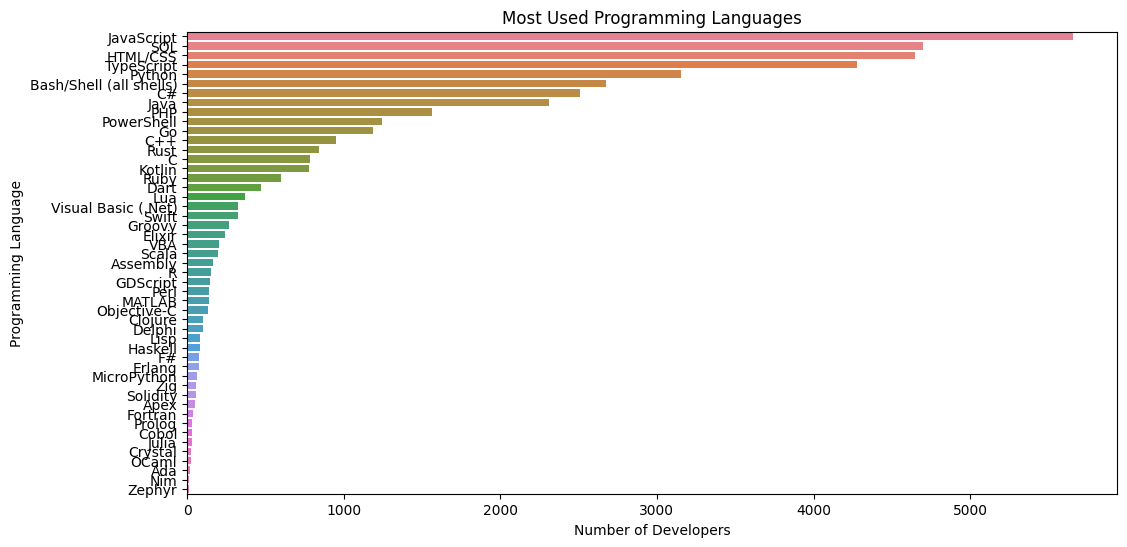

In [13]:
# Create an initial visualization of the programming languages used by surveyed developers to assess their potential influence on salary.

from collections import Counter
# Flatten all languages into a single list
all_languages = ";".join(df["LanguageHaveWorkedWith"]).split(";")
language_counts = Counter(all_languages)

# Convert to DataFrame
df_language_counts = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])
df_language_counts = df_language_counts.sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_language_counts['Count'], y=df_language_counts['Language'], hue=df_language_counts['Language'])
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.title("Most Used Programming Languages")
plt.show()

In [14]:
# Create a new variable for languages,  instead of using all 28 languages, I'll focus on the top 3 high-paying ones. Source: https://pesto.tech/resources/top-10-highest-paying-programming-languages-in-2024#:~:text=It's%20important%20to%20know%20which,your%20career%20and%20earning%20potential.
high_paying_languages = ['Rust', 'Go', 'Scala']

for lang in high_paying_languages:
    df[lang] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if lang in x else 0)

# Create a binary variable indicating whether a developer has worked with high-paying languages (1) or not (0).
df['High_Paying_Langs'] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if any(db in x for db in high_paying_languages) else 0)

These programming languages are often linked to higher salaries, making it worthwhile to analyze their impact. They could also be valuable features for models evaluating developer salaries.  

In [15]:
# Define high-paying platform categories using the same approach as high-paying languages.
high_paying_platforms = {'Amazon Web Services (AWS)', 'Kubernetes', 'VMware', 'Google Cloud'}

# Create a binary variable indicating whether a developer has worked with high-paying platforms (1) or not (0).
df['High_Paying_Platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: 1 if any(p in x for p in high_paying_platforms) else 0)

In [16]:
# Define high-paying cloud platform categories using the same approach as high-paying languages.
cloud_platforms = {'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud'}

# Create a binary variable indicating whether a developer has worked with high-paying cloud platforms (1) or not (0).
df['Cloud_Platform'] = df['PlatformHaveWorkedWith'].apply(lambda x: 1 if any(p in x for p in cloud_platforms) else 0)

In [17]:
# Explore the initial correlation of the newly created variables to pre-select features with the most potential influence.

correlation = df.corr(numeric_only=True)['ConvertedCompYearly'].sort_values(ascending=False)
print(correlation)

ConvertedCompYearly      1.000000
WorkExp                  0.243751
Cloud_Platform           0.085836
High_Paying_Platforms    0.066826
High_Paying_Langs        0.057211
Rust                     0.055136
Scala                    0.044095
JobSat                   0.043624
Go                       0.028526
num_languages            0.007379
ResponseId              -0.023197
num_platforms           -0.033437
num_databases           -0.038599
num_webframes           -0.072556
Name: ConvertedCompYearly, dtype: float64


The variables exhibit a correlation ranging from 0.08 to 0.02 with the salary variable. The correlation values ranging from 0.08 to 0.02 with the salary variable suggest a weak positive relationship between these variables and salary. This means that while there is some association, it is relatively small. 

In [18]:
# Drop columns LanguageHaveWorkedWith,DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith.
df = df.drop(['DevType','LanguageHaveWorkedWith','DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith','WebframeHaveWorkedWith'], axis=1)

In [19]:
# Detect outliers in the target variable 

# Function to get the number of outliers using IQR (Interquantile Range) method:

def outliers_iqr(df, columns, iqr_multiplier = 1.5):
    
    """Detect outliers in columns in a dataframe using the IQR method and returns a dataframe with # outliers, 
    IQR value, and upper and lower limits.
    Parameters:
    df: dataframe
    columns: list of columns names to detect outliers 
    iqr_multiplier: default value 1.5 (the closest to what Gaussian Distribution considers for outlier detection)
    
    Returns:
    results_df: dataframe with the results of the oultier detection"""
    
    results = []
    for column in columns:
        # Calculate quartiles and IQR
        q1, q3 = np.quantile(df[column], [0.25,0.75])
        iqr = q3 - q1
        
        # Calculate lower and upper limits
        lower_limit = q1 - iqr_multiplier * iqr
        upper_limit = q3 + iqr_multiplier * iqr
        
        # Count the number of outilers
        num_outliers = ((df[column] < lower_limit) | (df[column] > upper_limit)).sum()

         # Calculate the percentage of outliers
        total_values = len(df[column])
        outlier_percentage = (num_outliers / total_values) * 100
        
        # Store results in a dictionary
        result = {
            'Column' : column,
            'IQR': iqr,
            'Lower limit': lower_limit,
            'Upper limit': upper_limit,
            'Num Outliers': num_outliers,
            'Outlier Percentage': round(outlier_percentage, 2)  # Rounded to 2 decimal places
        }
        
        results.append(result)
    
    # Convert results to a dataframe and return it
    results_df = pd.DataFrame(results)
    results_df = results_df[['Column','IQR','Lower limit','Upper limit','Num Outliers','Outlier Percentage']]
    
    return results_df

In [20]:
target_column = ['ConvertedCompYearly']
outliers_df = outliers_iqr(df, target_column)
outliers_df

,Column,IQR,Lower limit,Upper limit,Num Outliers,Outlier Percentage
0,ConvertedCompYearly,73257.0,-77884.5,215143.5,245,3.39


Using the function to detect outliers in the target variable, I found that approximately 3.39% of the values are extreme and may require further handling.

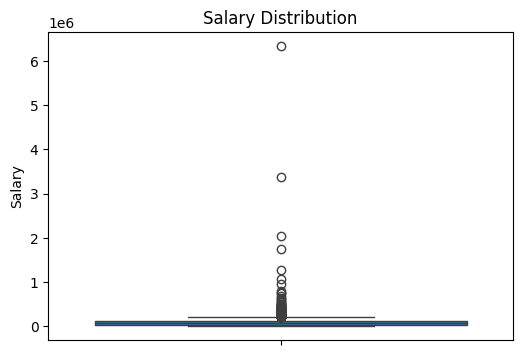

In [21]:
# Creating a Boxplot of compensation variable (target variable) to visualize the outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

The outliers are located in the upper part of the boxplot, indicating they are extreme salary values. Since the percentage of outliers is less than 5%, I will remove them, as this is a commonly used strategy for handling outliers.

In [22]:
# Function to remove outliers from a DataFrame column
def remove_outliers(df, columns):
    """Removes rows where the specified columns contain outliers based on the IQR method,
    but only if the outliers are 5% or less of the total values in each column.

    Parameters:
    df (DataFrame): The DataFrame containing the columns to process.
    columns (list of str): A list of column names to check for outliers.

    Returns:
    DataFrame: A new DataFrame with outlier rows removed if outliers are <= 5% of the total rows.
    """
    new_df = df.copy()
    
    for column in columns:
        if column in new_df:
            # Calculate quartiles and IQR
            q1, q3 = np.percentile(new_df[column].dropna(), [25, 75])
            iqr = q3 - q1

            # Define lower and upper bounds
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr

            # Identify outliers
            outliers = new_df[(new_df[column] < lower_limit) | (new_df[column] > upper_limit)]

            # If outliers are less than or equal to 5% of the total rows, remove them
            if len(outliers) <= 0.05 * len(new_df):
                new_df = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
            else:
                print(f"Outliers in column '{column}' are more than 5% of total values. No outliers removed.")
    
    return new_df

In [23]:
# Use the function to remove the outliers 
df_cleaned = remove_outliers(df, target_column)

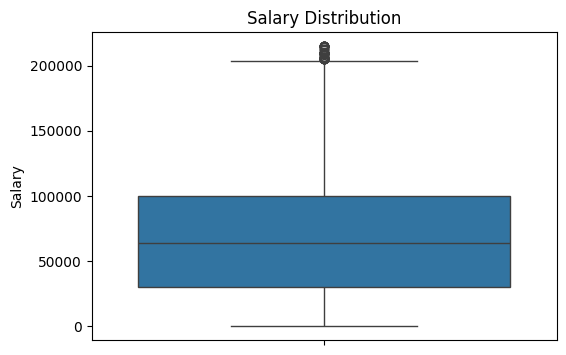

In [24]:
# Creating a Boxplot of compensation variable in the cleaned dataset
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cleaned['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

After removing the outliers, the target variable now appears more normally distributed.

In [25]:
# Check the unique country values to determine the number of countries in the dataset.
df_cleaned['Country'].value_counts()

Country
United States of America                                1298
Germany                                                  456
United Kingdom of Great Britain and Northern Ireland     432
India                                                    426
Ukraine                                                  424
                                                        ... 
Cameroon                                                   1
Mozambique                                                 1
Suriname                                                   1
Cambodia                                                   1
Cape Verde                                                 1
Name: count, Length: 140, dtype: int64

The dataset contains 140 countries, which is a large number of categories. To simplify, I will create a new variable called "Continent" to reduce the number of categories.

In [26]:
# Country to continent mapping
country_to_continent = {
    'Pakistan': 'Asia', 'Turkey': 'Asia', 'United States of America': 'North America', 
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Brazil': 'South America', 
    'South Africa': 'Africa', 'France': 'Europe', 'Canada': 'North America', 'Ukraine': 'Europe', 
    'Germany': 'Europe', 'Bolivia': 'South America', 'Morocco': 'Africa', 'India': 'Asia', 
    'Georgia': 'Asia', 'Ireland': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Switzerland': 'Europe', 'Lithuania': 'Europe', 'Netherlands': 'Europe', 'Romania': 'Europe', 
    'Latvia': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe', 'Portugal': 'Europe', 
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Israel': 'Asia', 'Serbia': 'Europe', 
    'Russian Federation': 'Asia', 'Bangladesh': 'Asia', 'Denmark': 'Europe', 'Poland': 'Europe', 
    'Saudi Arabia': 'Asia', 'Mexico': 'North America', 'Bulgaria': 'Europe', 'Slovakia': 'Europe', 
    'Algeria': 'Africa', 'Venezuela, Bolivarian Republic of...': 'South America', 'Malaysia': 'Asia', 
    'Finland': 'Europe', 'Malta': 'Europe', 'Belgium': 'Europe', 'Croatia': 'Europe', 
    'Argentina': 'South America', 'Slovenia': 'Europe', 'Isle of Man': 'Europe', 'Palestine': 'Asia', 
    'Ecuador': 'South America', 'Greece': 'Europe', 'Paraguay': 'South America', 'Guatemala': 'North America', 
    'New Zealand': 'Oceania', 'Egypt': 'Africa', 'Nigeria': 'Africa', 'South Korea': 'Asia', 
    'Hungary': 'Europe', 'Peru': 'South America', 'Australia': 'Oceania', 'Philippines': 'Asia', 
    'Japan': 'Asia', 'United Arab Emirates': 'Asia', 'Thailand': 'Asia', 'Uruguay': 'South America', 
    'Hong Kong (S.A.R.)': 'Asia', 'China': 'Asia', 'Sri Lanka': 'Asia', 'Singapore': 'Asia', 
    'Armenia': 'Asia', 'Nepal': 'Asia', 'Norway': 'Europe', 'Taiwan': 'Asia', 'Lebanon': 'Asia', 
    'Iran, Islamic Republic of...': 'Asia', 'Benin': 'Africa', 'Democratic Republic of the Congo': 'Africa', 
    'Syrian Arab Republic': 'Asia', 'Namibia': 'Africa', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia', 
    'Estonia': 'Europe', 'Tunisia': 'Africa', 'Viet Nam': 'Asia', 'Dominican Republic': 'North America', 
    'Burundi': 'Africa', 'Kazakhstan': 'Asia', 'Rwanda': 'Africa', 'Sierra Leone': 'Africa', 
    'Panama': 'North America', 'Cuba': 'North America', 'Costa Rica': 'North America', 'Uzbekistan': 'Asia', 
    'Colombia': 'South America', 'Ethiopia': 'Africa', 'Jordan': 'Asia', 'Jamaica': 'North America', 
    'Ghana': 'Africa', 'Andorra': 'Europe', 'Republic of North Macedonia': 'Europe', 
    'Bosnia and Herzegovina': 'Europe', 'Kuwait': 'Asia', 'Qatar': 'Asia', 'Kenya': 'Africa', 
    'Luxembourg': 'Europe', 'Belarus': 'Europe', 'Sudan': 'Africa', 'Mauritius': 'Africa', 
    'Indonesia': 'Asia', 'Afghanistan': 'Asia', 'Maldives': 'Asia', 'Kosovo': 'Europe', 
    'Angola': 'Africa', "Côte d'Ivoire": 'Africa', 'Republic of Moldova': 'Europe', 'Zambia': 'Africa', 
    'Turkmenistan': 'Asia', 'Albania': 'Europe', 'Oman': 'Asia', 'Azerbaijan': 'Asia', 'Myanmar': 'Asia', 
    'Montenegro': 'Europe', 'Chile': 'South America', 'Libyan Arab Jamahiriya': 'Africa', 
    'Nicaragua': 'North America', 'Bahrain': 'Asia', 'Bhutan': 'Asia', 'Zimbabwe': 'Africa', 
    'Iceland': 'Europe', 'Mozambique': 'Africa', 'Honduras': 'North America', 'Senegal': 'Africa', 
    'Cambodia': 'Asia', 'Iraq': 'Asia', 'Cameroon': 'Africa', 'Barbados': 'North America', 
    'United Republic of Tanzania': 'Africa', 'Suriname': 'South America', 'Cape Verde': 'Africa', 
    'El Salvador': 'North America', 'Mongolia': 'Asia', 'Nomadic': 'Other', 'Trinidad and Tobago': 'North America', 
    'Malawi': 'Africa'
}

# Mapping the country column to continents
df_cleaned['Continent'] = df_cleaned['Country'].map(country_to_continent)


In [27]:
# Drop the country column
df_cleaned = df_cleaned.drop(['Country'], axis=1)

# Drop row with value other in continent
df_cleaned = df_cleaned[df_cleaned['Continent'] != 'Other'].reset_index(drop=True)
df_cleaned = df_cleaned.dropna()

In [28]:
# Evaluate the "Continent" column to examine the number of surveyed developers by continent.
print(df_cleaned['Continent'].value_counts())


Continent
Europe           3270
North America    1666
Asia             1230
South America     431
Oceania           189
Africa            188
Name: count, dtype: int64


The majority of surveyed developers are from Europe, making up 47% of the total. The remaining 43% is distributed between North America and Asia, while developers from South America, Oceania, and Africa are minimally represented.

In [29]:
# Check the unique country values to determine the number of education levels in the dataset.
df_cleaned['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          3511
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1735
Some college/university study without earning a degree                                 863
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     347
Associate degree (A.A., A.S., etc.)                                                    274
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         147
Something else                                                                          63
Primary/elementary school                                                               34
Name: count, dtype: int64

In [30]:
df_cleaned.shape

(6974, 21)

The education level categories are quite detailed. I will simplify them to make them more understandable.

In [31]:
# Function to simplify education level categories
def generalize_education(level):
    if pd.isna(level):
        return "Other"  # or any default value you'd prefer for NaN values
    level = level.strip().lower()  # Remove leading/trailing spaces and make it lowercase
    if level == 'primary/elementary school':
        return 'Primary'
    elif level == 'secondary school (e.g. american high school, german realschule or gymnasium, etc.)':
        return 'Secondary'
    elif level == "associate degree (a.a., a.s., etc.)":
        return "Associate"
    elif level == "bachelor’s degree (b.a., b.s., b.eng., etc.)":
        return "Bachelor’s"
    elif level == "master’s degree (m.a., m.s., m.eng., mba, etc.)":
        return "Master’s"
    elif level == "professional degree (jd, md, ph.d, ed.d, etc.)":
        return "Doctorate/Professional"
    elif level == "some college/university study without earning a degree":
        return "Some College"
    elif level == "something else":
        return "Other"
    else:
        return "Other"



# Apply function 
df_cleaned['Edlevel_Simplified'] = df_cleaned['EdLevel'].apply(generalize_education)

In [32]:
# Drop the EdLevel column
df_cleaned = df_cleaned.drop(['EdLevel'], axis=1)

### 5. Exploratory Data Analysis (EDA)

In [33]:
# Check Data Types
df_cleaned.dtypes

ResponseId                 int64
Age                       object
RemoteWork                object
YearsCodePro              object
OrgSize                   object
WorkExp                  float64
Industry                  object
JobSat                   float64
ConvertedCompYearly      float64
num_languages              int64
num_databases              int64
num_platforms              int64
num_webframes              int64
Rust                       int64
Go                         int64
Scala                      int64
High_Paying_Langs          int64
High_Paying_Platforms      int64
Cloud_Platform             int64
Continent                 object
Edlevel_Simplified        object
dtype: object

- **Age** is currently a categorical variable; later in the feature engineering section, I will convert it into a numerical code.
- **YearsCode** and **YearsCodePro** are of object type but contain numerical values; I will convert them to integers.
- Other categorical variables ( **OrgSize**, **EdLevel_simplified**, **role_category**, **Industry**, **continent**) will be encoded in the feature engineering section for use in the modeling phase.

In [34]:
# Create the numeric variable for Age.
# Map age ranges to numerical values (midpoints)
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Prefer not to say": np.nan  # Handle unknown values as NaN
}

# Convert the "Age" variable to a numeric variable, "Age_Num"
df_cleaned["Age_Num"] = df_cleaned["Age"].map(age_mapping)

In [35]:
# Convert Years code pro to numeric variable
# Replace special values with numeric equivalents YearsCodePro
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].replace({
    'More than 50 years': 51,
    'Less than 1 year': 0
})

# Convert the variable to integers (numeric variable)
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].apply(pd.to_numeric, errors='coerce', downcast='integer')

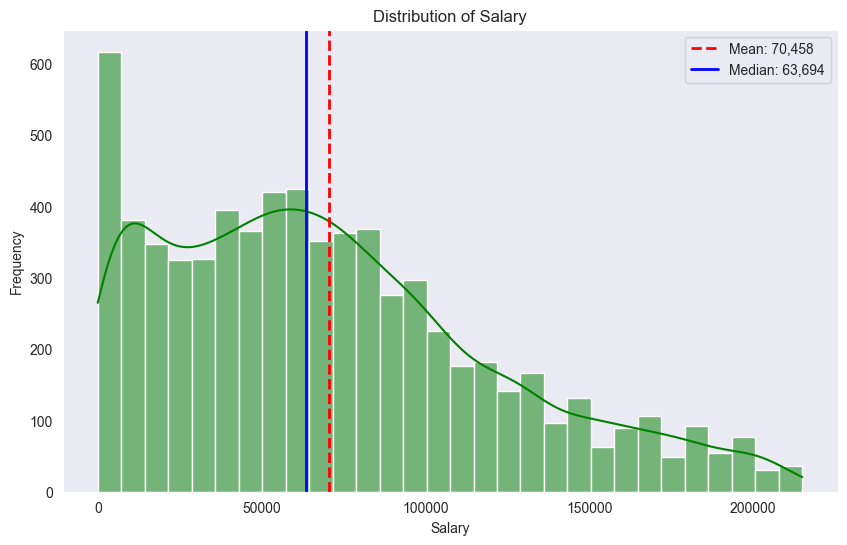

In [36]:
# Target variable
# Histogram of Salary distribution
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['ConvertedCompYearly'], kde=True, color='green', bins=30)
# Calculate and plot mean and median
mean_salary = df_cleaned['ConvertedCompYearly'].mean()
median_salary = df_cleaned['ConvertedCompYearly'].median()
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_salary:,.0f}')
plt.axvline(median_salary, color='blue', linestyle='solid', linewidth=2, label=f'Median: {median_salary:,.0f}')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The salary variable is right-skewed, indicating that most salaries are concentrated at the lower end, with a few developers earning significantly higher amounts. The mean salary is $70,000, while 50% of developers earn up to $64,000.

In [37]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'RemoteWork', 'YearsCodePro', 'OrgSize', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly', 'num_languages',
       'num_databases', 'num_platforms', 'num_webframes', 'Rust', 'Go',
       'Scala', 'High_Paying_Langs', 'High_Paying_Platforms', 'Cloud_Platform',
       'Continent', 'Edlevel_Simplified', 'Age_Num'],
      dtype='object')

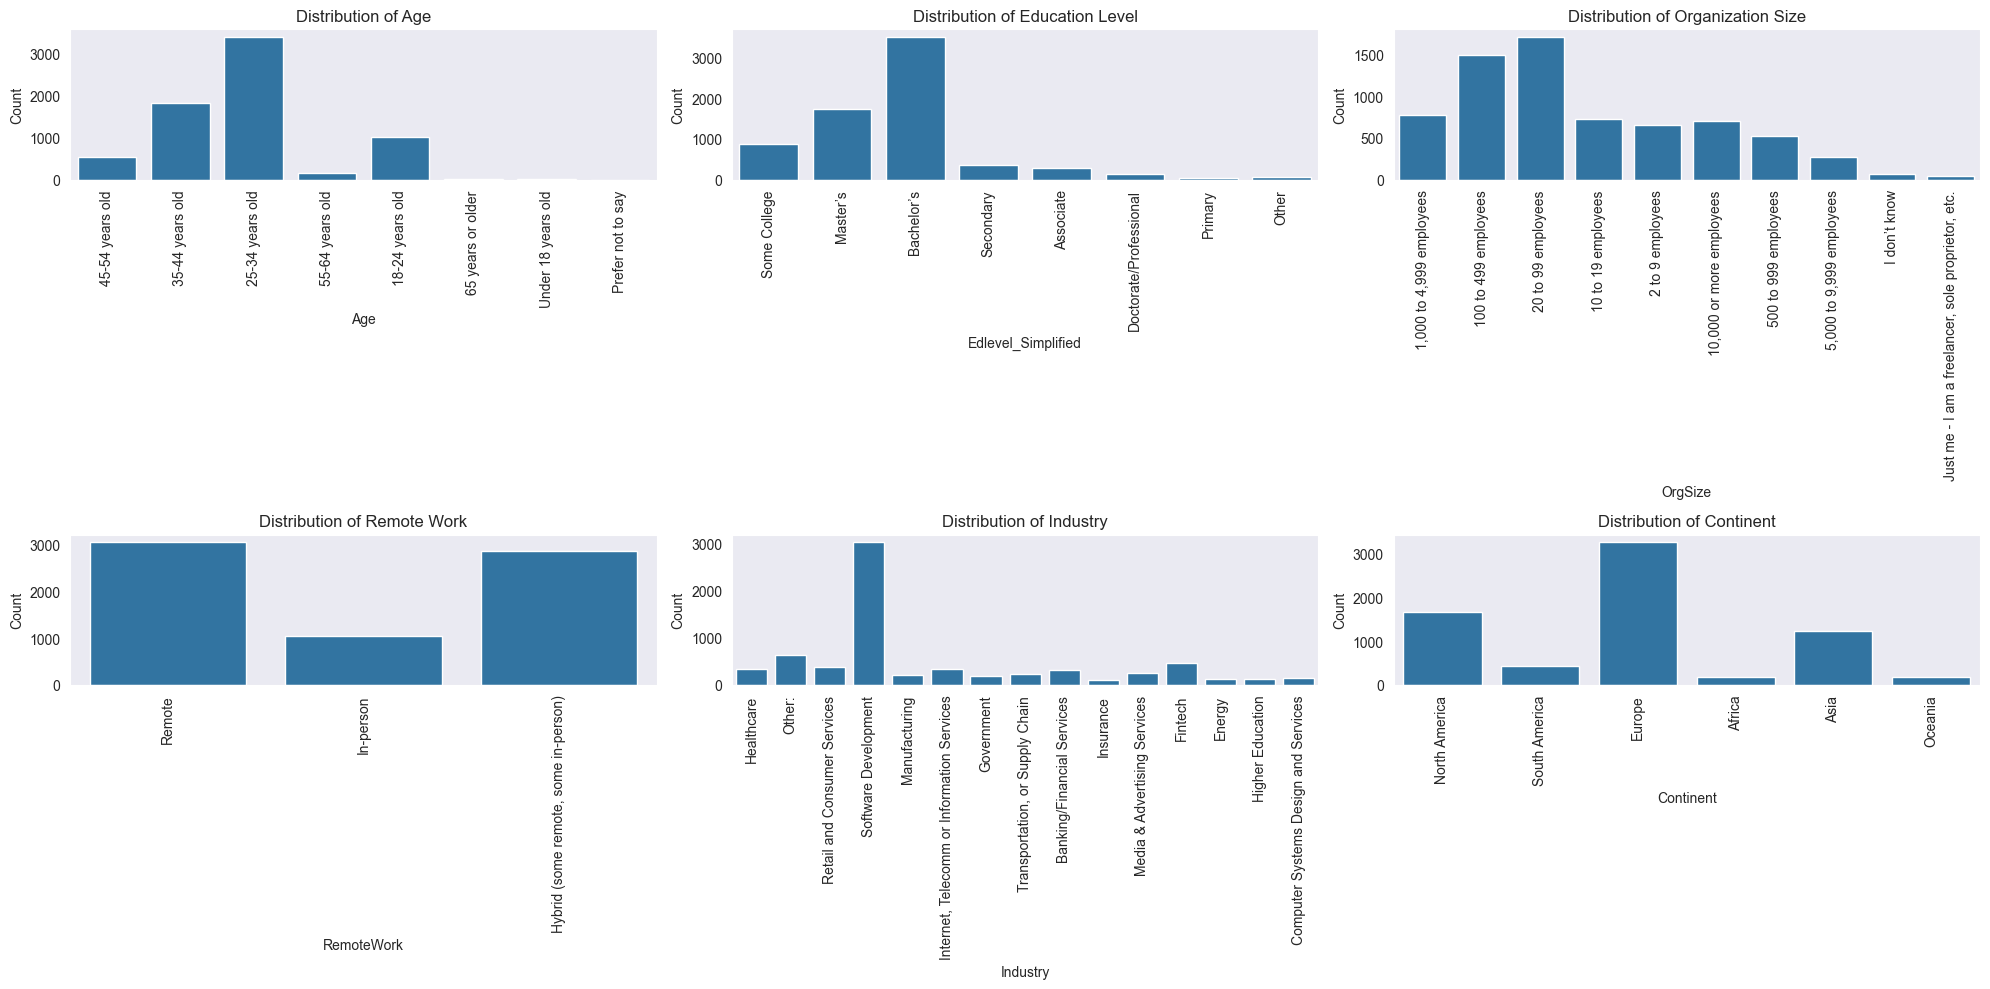

In [38]:
# Create a figure with subplots to display all 6 bar charts
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Define columns and titles for iteration
columns = ['Age', 'Edlevel_Simplified', 'OrgSize', 'RemoteWork', 'Industry', 'Continent']
titles = [
    'Distribution of Age', 'Distribution of Education Level', 'Distribution of Organization Size',
    'Distribution of Remote Work', 'Distribution of Industry', 'Distribution of Continent'
]

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns):
    if col in df_cleaned.columns:
        sns.countplot(x=col, data=df_cleaned, ax=axes[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- **Age**: Most developers surveyed are between 25 and 34 years old, making this a relatively young group. 
- **Education Level**: The majority of developers hold a bachelor's degree.  This could be relevant when analyzing the relationship between education and salary, with higher education potentially correlating with higher compensation.
- **Organization Size**: Developers are primarily employed in small to mid-sized organizations, with the largest groups working in companies with 20-99 employees (around 25%) and 100-499 employees (about 20%). 
- **Remote Work**: A significant portion of developers (around 75%) work remotely or in a hybrid setup, with only a small percentage working full-time in-person. This shift could be reflective of the growing trend of remote work, which offers greater flexibility and broader talent pools, particularly in the tech industry.  
- **Industry**: A large majority of developers are employed in the software development industry, with other industries such as finance, healthcare, and education making up a smaller portion.

In [39]:
import scipy.stats as stats

# List of categorical variables to test
categorical_vars = ['Edlevel_Simplified', 'OrgSize', 'RemoteWork', 'Industry', 'Continent']

# Ensure ConvertedCompYearly has no NaN values
df_anova = df_cleaned[['ConvertedCompYearly'] + categorical_vars].dropna()

# Function to perform ANOVA for each categorical variable
def perform_anova(df, categorical_vars):
    results = {}

    for var in categorical_vars:
        # Ensure each category has at least 2 unique salary values
        valid_categories = [category for category in df[var].unique()
                            if df[df[var] == category]['ConvertedCompYearly'].nunique() > 1]
        
        if len(valid_categories) > 1:
            f_stat, p_value = stats.f_oneway(*[df[df[var] == category]['ConvertedCompYearly']
                                               for category in valid_categories])
            results[var] = {'F-Statistic': f_stat, 'p-value': p_value}
        else:
            results[var] = {'Error': "Not enough variance or unique values for ANOVA"}
    
    return results

# Run ANOVA for all categorical variables
anova_results = perform_anova(df_anova, categorical_vars)

# Convert results to DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
print(anova_df)



                    F-Statistic       p-value
Edlevel_Simplified     7.235306  1.161561e-08
OrgSize               26.649891  9.269602e-46
RemoteWork           178.898534  1.712173e-76
Industry              17.825887  2.563762e-44
Continent            924.052123  0.000000e+00


 Variable              | F-Statistic | p-value          | Interpretation |
|----------------------|------------|------------------|---------------|
| **Edlevel_Simplified** | 7.23       | **1.16e-08** (very low) | Education level has a significant impact on salary. |
| **OrgSize**          | 26.65      | **9.27e-46** (extremely low) | Company size strongly influences salary. |
| **RemoteWork**       | 178.89     | **1.71e-76** (almost zero) | Remote work status has a major effect on salary. |
| **Industry**         | 17.83      | **2.56e-44** (extremely low) | Industry significantly impacts salary. |
| **Continent**        | 924.05     | **0.0** (absolute zero) | Location (continent) is the **strongest factor** affecting salary. |

## 📌 Key Takeaways
- **All variables have very small p-values (< 0.05), meaning they significantly affect salary.**  
- **Continent (p=0.0, F=924.05)** has the strongest impact, suggesting that salary differences across continents are **huge**.
- **RemoteWork (p=1.71e-76, F=178.89)** also has a major effect, indicating that whether someone works remotely affects their salary a lot.
- **OrgSize (F=26.65), Industry (F=17.83), and Education (F=7.23)** also contribute but to a lesser extent.

In [40]:
# Define the dominant continents
dominant_continents = ['Europe', 'North America', 'Asia']

# Create a new column with "Other" for less frequent categories
df_cleaned['continent_grouped'] = df_cleaned['Continent'].apply(lambda x: x if x in dominant_continents else 'Other')


In [41]:
# Find the dominant category (most frequent one)
dominant_category = df_cleaned['Industry'].value_counts().idxmax()
print(f"Dominant Category: {dominant_category}")

# Create a new binary column
df_cleaned['industry_binary'] = (df_cleaned['Industry'] == dominant_category).astype(int)


Dominant Category: Software Development


In [42]:
def bin_org_size(size):
    if size in ["Just me - I am a freelancer, sole proprietor, etc.", "2 to 9 employees", "10 to 19 employees","I don't know"]:
        return "Small"
    elif size in ["20 to 99 employees", "100 to 499 employees"]:
        return "Medium"
    elif size in ["500 to 999 employees","1,000 to 4,999 employees"]:
        return "Large"
    elif size in ["5,000 to 9,999 employees", "10,000 or more employees"]:
        return "Extra Large"
    else:
        return "Small"  

df_cleaned['OrgSize_binned'] = df_cleaned['OrgSize'].apply(bin_org_size)

In [43]:
df_cleaned['OrgSize_binned'].value_counts()

OrgSize_binned
Medium         3209
Small          1496
Large          1297
Extra Large     972
Name: count, dtype: int64

In [44]:
# Define the most frequent education levels
frequent_levels = ['Bachelor’s', 'Master’s', 'Some College']

# Group the less frequent categories into "Other"
df_cleaned['EdLevel_grouped'] = df_cleaned['Edlevel_Simplified'].apply(lambda x: x if x in frequent_levels else 'Other')


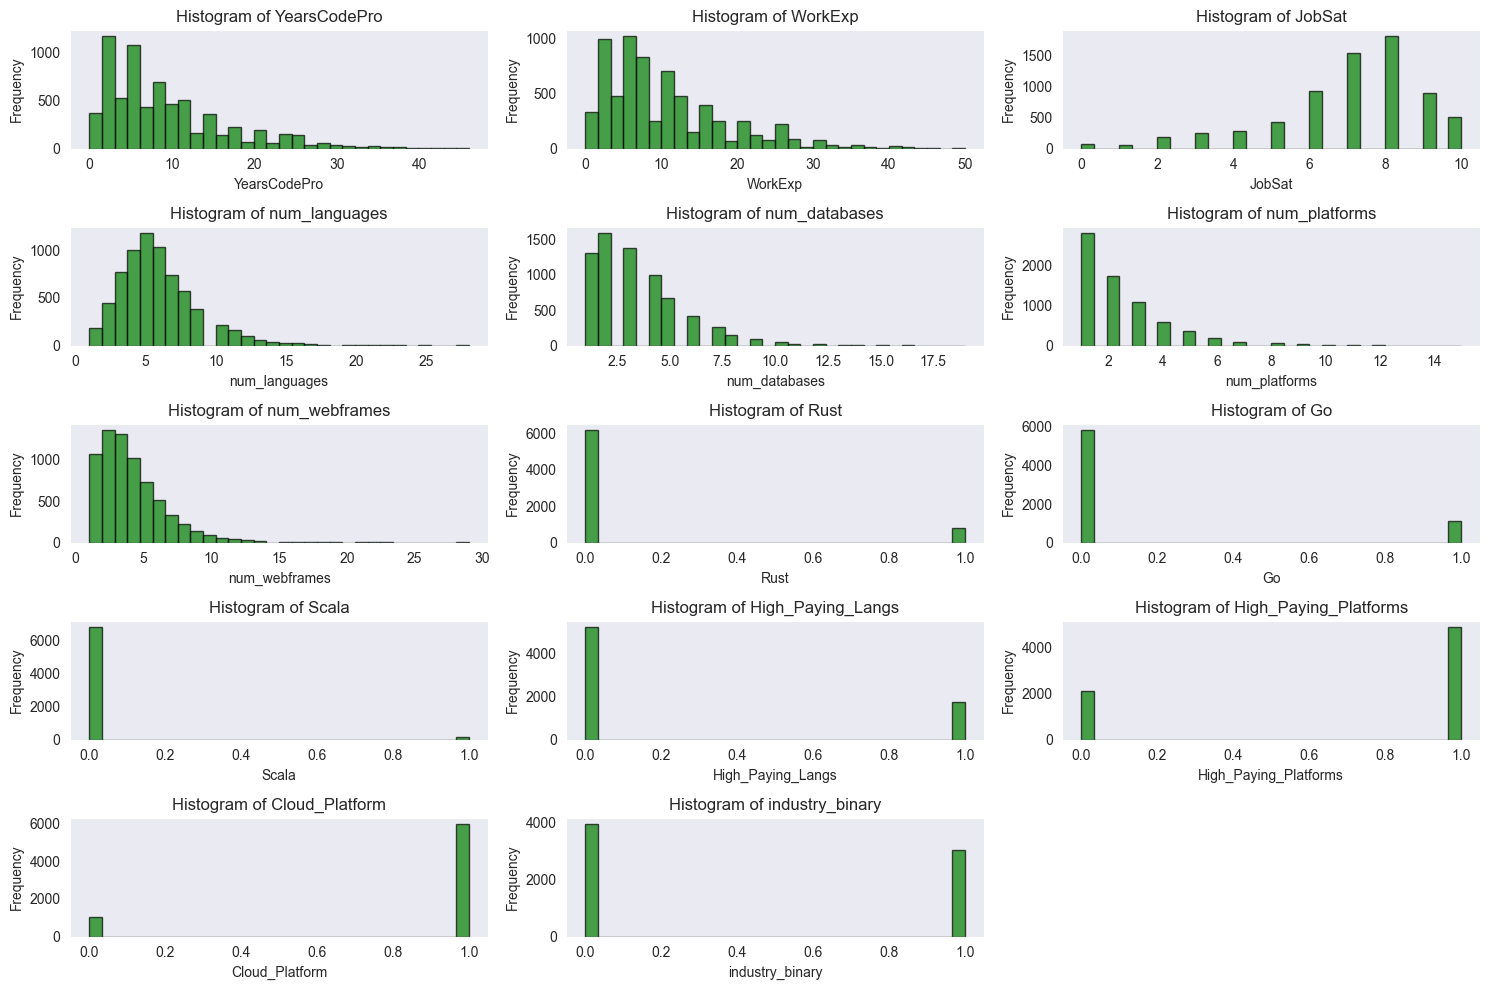

In [45]:
# Select numeric columns, excluding specific ones
exclude_cols = {'Age_Num', 'ResponseId', 'ConvertedCompYearly'}
numeric_cols = [col for col in df_cleaned.select_dtypes(include=['number']).columns if col not in exclude_cols]

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) - 1) // 3 + 1, 3, i)  
    plt.hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Years of Code Pro and Work Experience**: These two variables exhibit very similar distributions, as they are closely related. In the correlation matrix analysis, I will examine if they are correlated and select the one with the stronger correlation for use in the modeling phase.  
- **Job Satisfaction**: Most developers report high job satisfaction, with the majority scoring 8 or 9 out of 10. This indicates a generally positive outlook among developers regarding their work.  
- **Number of Languages**: The majority of developers know up to 5 programming languages, with very few knowing more than 9. This suggests that developers tend to specialize in a small set of languages, rather than mastering a wide range.  
- **Number of Databases**: Most developers are familiar with 1 or 2 database systems, indicating that while database knowledge is important, it is typically not the primary focus of developers' skill sets.  
- **Number of Platforms**: The majority of developers work with just one platform, suggesting that specialization in a particular platform is more common than working across multiple platforms.  
- **Number of Web Frameworks**: Most developers know up to 4 web frameworks, which highlights the importance of mastering a few key frameworks in the web development field.  
- **Experience with Rust, Go, or Scala**: Very few developers have worked with Rust, Go, or Scala.
- **Experience with High-Paying Languages**: Most developers have not worked with high-paying languages, which could suggest that developers may not be specializing in languages that typically command higher salaries.  
- **Experience with High-Paying Platforms**: Most developers have experience working with high-paying platforms, indicating that developers may be more likely to work with platforms that have higher salary potential.  
- **Experience with Cloud Platforms**: A significant portion of developers have experience working with cloud platforms, which aligns with the growing demand for cloud-related skills in the tech industry.

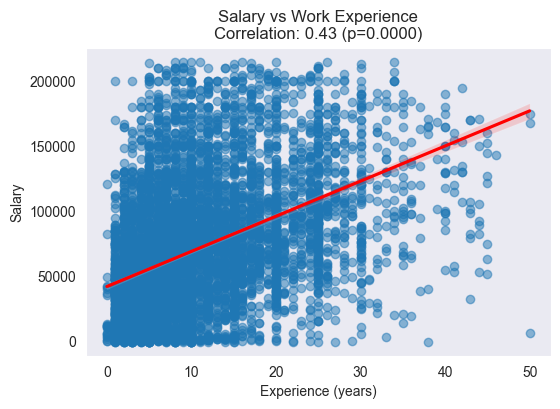

In [46]:
# Examine the correlation between salary and work experience, as it is generally believed that more work experience leads to higher salaries.

from scipy.stats import pearsonr

# Calculate correlation coefficient
corr, p_value = pearsonr(df_cleaned['WorkExp'], df_cleaned['ConvertedCompYearly'])

plt.figure(figsize=(6,4))
# Scatter plot with regression line
sns.regplot(x=df_cleaned['WorkExp'], 
            y=df_cleaned['ConvertedCompYearly'], 
            scatter_kws={'alpha':0.5},  # Adjust transparency
            line_kws={'color':'red'})  # Trend line color

plt.title(f'Salary vs Work Experience\nCorrelation: {corr:.2f} (p={p_value:.4f})')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

The correlation between salary and work experience is 0.44, indicating a moderate positive relationship. This suggests that while work experience has an impact on salary, other factors (e.g., education, industry, company size) may also play a significant role in determining salary.

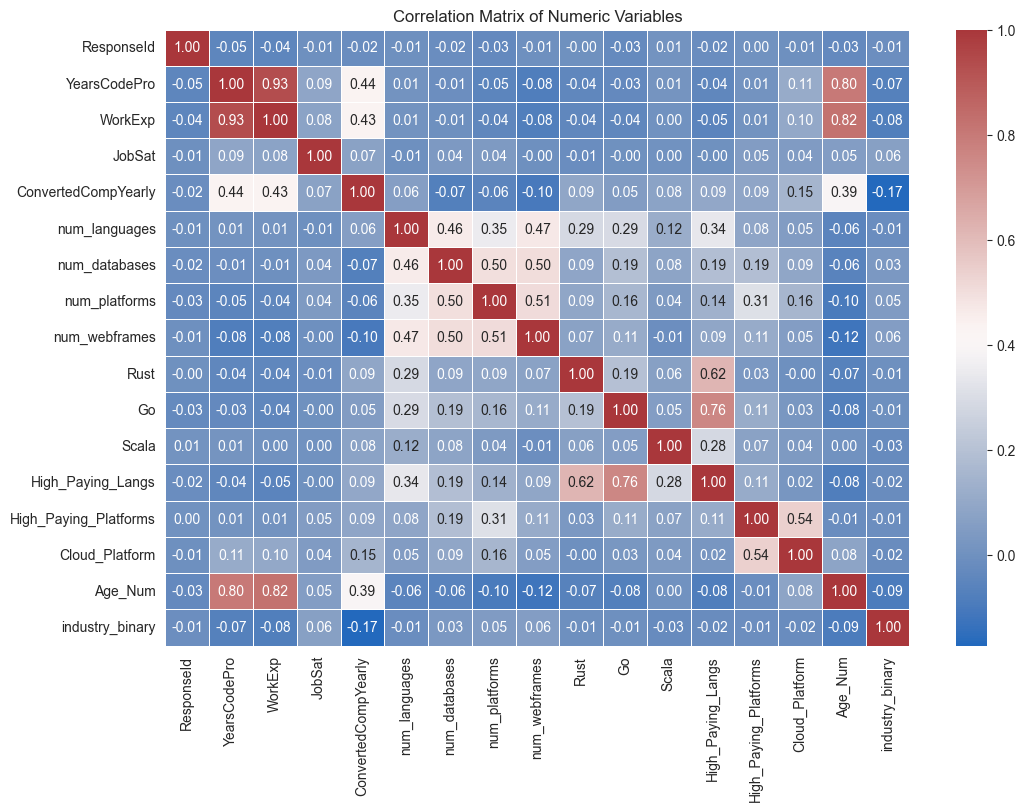

In [47]:
# Compute correlation matrix for numeric variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Numeric Variables")
plt.show()


From the correlation analysis of the numeric variables, we can identify potential influential variables for our model (those with a correlation of 0.15 or greater with salary), including:
- Years of Code Pro, Work Experience, Cloud Platform, industry_binary and Age.  
However, Years of Code Pro, Work Experience, and Age are highly correlated, which could lead to multicollinearity. Therefore, I will retain only **Work Experience** and **Cloud Platform** for the next steps.

In [48]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'RemoteWork', 'YearsCodePro', 'OrgSize', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly', 'num_languages',
       'num_databases', 'num_platforms', 'num_webframes', 'Rust', 'Go',
       'Scala', 'High_Paying_Langs', 'High_Paying_Platforms', 'Cloud_Platform',
       'Continent', 'Edlevel_Simplified', 'Age_Num', 'continent_grouped',
       'industry_binary', 'OrgSize_binned', 'EdLevel_grouped'],
      dtype='object')

In [49]:
columns_to_drop = ['YearsCodePro' ,'num_databases', 'num_platforms', 'num_webframes','Rust', 'Go', 'Scala','JobSat','num_languages','High_Paying_Langs', 'High_Paying_Platforms',
                   'Age_Num','Age','Industry','OrgSize','Continent','Edlevel_Simplified']

df_cleaned = df_cleaned.drop(columns= columns_to_drop)

### 6. Feature Engineering 

The next step is encoding the selected variables so they can be used in the models.  

I will experiment with two models: **Linear Regression** and **Random Forest**.  

- **For Linear Regression**: I will use **one-hot encoding** for all categorical variables to ensure they are properly represented in the model.  
- **For Random Forest**:  
  - I will apply **label encoding** to ordinal variables such as **Education Level** and **Organization Size**, replacing category names with integers while preserving their order.  
  - For **Continent**, I will use **one-hot encoding** to avoid imposing a false numerical relationship between categories.  


In [50]:
# Check dataset with the selected variables.
df_cleaned.head()

,ResponseId,RemoteWork,WorkExp,ConvertedCompYearly,Cloud_Platform,continent_grouped,industry_binary,OrgSize_binned,EdLevel_grouped
0,399,Remote,30.0,195000.0,1,North America,0,Large,Some College
1,417,Remote,17.0,170000.0,1,Other,0,Medium,Master’s
2,432,In-person,25.0,85000.0,1,North America,0,Medium,Bachelor’s
3,433,Remote,20.0,160000.0,1,North America,1,Small,Other
4,445,Remote,10.0,146496.0,1,Europe,1,Medium,Bachelor’s


### Linear regresion dataset

In [51]:
# List of categorical columns
cat_features = ['continent_grouped', 'OrgSize_binned', 'EdLevel_grouped','RemoteWork']

# Apply One-Hot Encoding
df_linear = pd.get_dummies(df_cleaned, columns=cat_features, drop_first=True)

df_linear.head() 

,ResponseId,WorkExp,ConvertedCompYearly,Cloud_Platform,industry_binary,continent_grouped_Europe,continent_grouped_North America,continent_grouped_Other,OrgSize_binned_Large,OrgSize_binned_Medium,OrgSize_binned_Small,EdLevel_grouped_Master’s,EdLevel_grouped_Other,EdLevel_grouped_Some College,RemoteWork_In-person,RemoteWork_Remote
0,399,30.0,195000.0,1,0,False,True,False,True,False,False,False,False,True,False,True
1,417,17.0,170000.0,1,0,False,False,True,False,True,False,True,False,False,False,True
2,432,25.0,85000.0,1,0,False,True,False,False,True,False,False,False,False,True,False
3,433,20.0,160000.0,1,1,False,True,False,False,False,True,False,True,False,False,True
4,445,10.0,146496.0,1,1,True,False,False,False,True,False,False,False,False,False,True


In [52]:
# Define features and target
X_linear = df_linear.drop(columns=['ConvertedCompYearly','ResponseId'])
y = df_linear['ConvertedCompYearly']

### Random forest dataset

In [53]:
# Copy original dataframe for Random Forest
df_rf = df_cleaned.copy()

org_size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2, 'Extra Large': 3}
ed_level_mapping = {'Bachelor’s':2 , 'Master’s': 3, 'Some College': 1, 'Other': 0}

df_rf['OrgSize_binned_encoded'] = df_rf['OrgSize_binned'].map(org_size_mapping)
df_rf['EdLevel_grouped_encoded'] = df_rf['EdLevel_grouped'].map(ed_level_mapping)
df_rf = pd.get_dummies(df_rf, columns=['continent_grouped','RemoteWork'], drop_first=True)

df_rf.head()

,ResponseId,WorkExp,ConvertedCompYearly,Cloud_Platform,industry_binary,OrgSize_binned,EdLevel_grouped,OrgSize_binned_encoded,EdLevel_grouped_encoded,continent_grouped_Europe,continent_grouped_North America,continent_grouped_Other,RemoteWork_In-person,RemoteWork_Remote
0,399,30.0,195000.0,1,0,Large,Some College,2,1,False,True,False,False,True
1,417,17.0,170000.0,1,0,Medium,Master’s,1,3,False,False,True,False,True
2,432,25.0,85000.0,1,0,Medium,Bachelor’s,1,2,False,True,False,True,False
3,433,20.0,160000.0,1,1,Small,Other,0,0,False,True,False,False,True
4,445,10.0,146496.0,1,1,Medium,Bachelor’s,1,2,True,False,False,False,True


In [54]:
# Define features and target
X_rf = df_rf.drop(columns=['ConvertedCompYearly','ResponseId','OrgSize_binned','EdLevel_grouped'])

### 7. Splitting Data into Training & Testing Sets

The dataset was split into **80% training data** and **20% test data**, ensuring a balanced approach to model evaluation.  

In [55]:
# Train-test split for linear regression
X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=38)

In [56]:
# Train-test split for random forest
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=38)

### 8. Model Training

In [57]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_linear, y_train)
y_pred_lr = lin_reg.predict(X_test_linear)

In [58]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features = 'log2',random_state=38)
rf.fit(X_train_rf, y_train)
y_pred_rf = rf.predict(X_test_rf)

### 9. Model Performance Metrics

In [59]:
# Function to evaluate the models'performance:

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results = {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2,
    }
    
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")
    return results


results_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression - MAE: 27834.87, MSE: 1380608243.83, RMSE: 37156.54, R2: 0.49
Random Forest - MAE: 27190.70, MSE: 1311176021.85, RMSE: 36210.16, R2: 0.51


C:\Users\Carolina\AppData\Local\Temp\ipykernel_15236\104706124.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_15236\104706124.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_15236\104706124.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_15236\104706124.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)


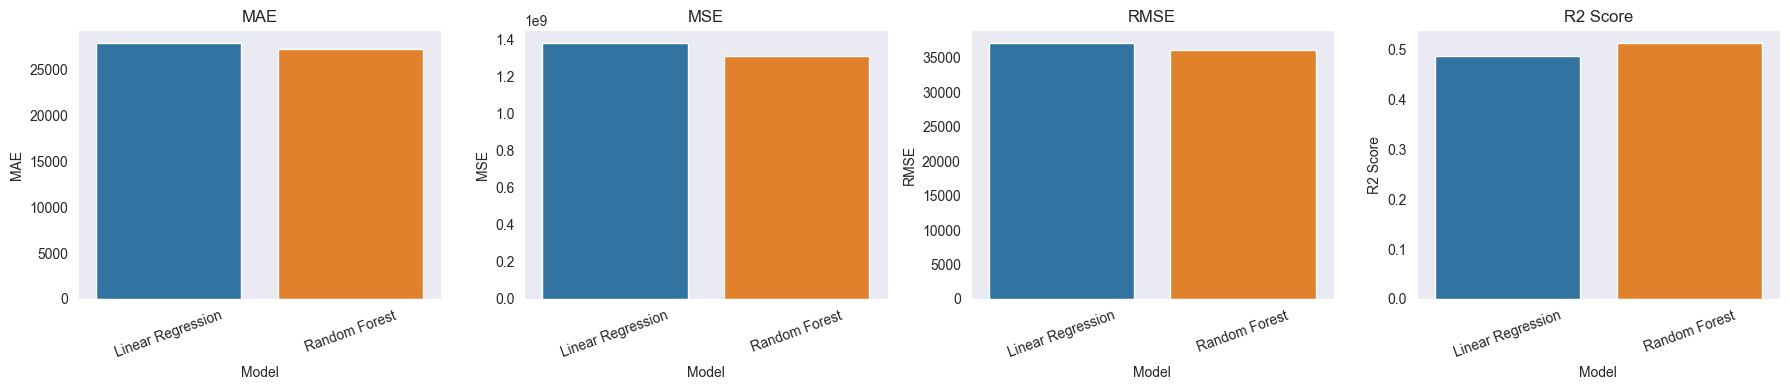

In [60]:
# Plot the preformance metrics of both models in bar charts
def plot_model_performance(results_list):
    """
    Plots bar charts comparing different models' performance metrics.

    Parameters:
        results_list (list of dicts): List of model evaluation results from evaluate_model function.
    """
    df = pd.DataFrame(results_list)
    df.set_index("Model", inplace=True)
    
    # Define metrics to plot
    metrics = ["MAE", "MSE", "RMSE", "R2 Score"]
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 4))

    for i, metric in enumerate(metrics):
        sns.barplot(x=df.index, y=df[metric], ax=axes[i], hue=df.index)
        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].set_xticklabels(df.index, rotation=20)
    
    plt.tight_layout()
    plt.show()


results_list = [results_lr, results_rf]  
plot_model_performance(results_list)

### Insights from Model Performance Metrics  

Linear Regression - MAE: 27834.87, MSE: 1380608243.83, RMSE: 37156.54, R2: 0.49
Random Forest - MAE: 27190.70, MSE: 1311176021.85, RMSE: 36210.16, R2: 0.51


- The **Linear Regression model** achieved:  
  - **Mean Absolute Error (MAE):** 27,834.87
  - **Mean Squared Error (MSE):** 138,060,8243.83
  - **Root Mean Squared Error (RMSE):** 37,156.54  
  - **R² Score:** 0.49  

- The **Random Forest model** performed slightly better than Linear Regression:  
  - **Lower MAE (27,834.87 vs. 27,190.70 USD),** indicating it made slightly smaller absolute errors on average.  
  - **Lower MSE (Mean Squared Error),** suggesting better overall predictions.  
  - A **slightly higher R² score (0.51),** indicating it explains slightly more variance in salary.  

In [61]:
# Function to plot feature importance on a linear regression model 
def plot_lr_feature_importance(model, feature_names):
    """
    Plots the feature importance for a Linear Regression model.
    
    Parameters:
        model: Trained Linear Regression model (e.g., sklearn's LinearRegression)
        feature_names: List of feature names used in training the model
    """
    # Get coefficients
    coef = model.coef_
    
    # Create DataFrame
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
    coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False) 
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.barh(coef_df["Feature"], coef_df["Coefficient"], color=np.where(coef_df["Coefficient"] > 0, "green", "red"))
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Linear Regression Model")
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)  
    plt.gca().invert_yaxis() 
    plt.show()


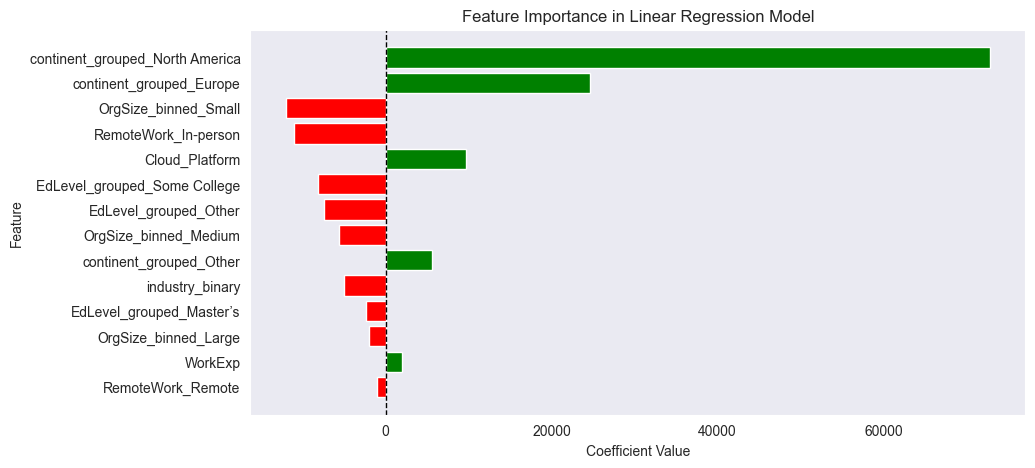

In [62]:
feature_names = X_train_linear.columns  
plot_lr_feature_importance(lin_reg, feature_names)


### Insights from Linear Regression Model  

- The **Continent (North America)** variable had the highest positive coefficient, indicating that developers from **North America tend to earn higher salaries**.  
- **Europe** also showed a positive influence on salary, though slightly lower compared to North America, suggesting that developers from these regions tend to have higher earnings.  
- Developers working in **smaller organizations** tend to earn **lower salaries**, indicating a potential correlation between company size and salary levels.  
- **Experience with cloud platforms** showed a **positive relationship with salary**, suggesting that skills in cloud technologies may be valuable for higher earnings.  
- While **Work Experience** had a higher correlation with salary in the exploratory analysis, it appeared **less significant** in the regression model, indicating that other factors might have a stronger impact when considered collectively.  

### Takeaways:  
- **Location significantly influences salary**, with North America and Europe offering higher salaries for developers compared to other regions.  
- **Company size affects salary**, with smaller organizations generally paying lower salaries.  
- **Cloud platform experience** is an important skill that correlates with higher salaries, suggesting it is a key factor in earnings potential.  
- The lower importance of **Work Experience in the model** suggests that salary may not increase linearly with experience, or other factors such as skills, job role, and industry type could have a stronger impact on salary prediction.    

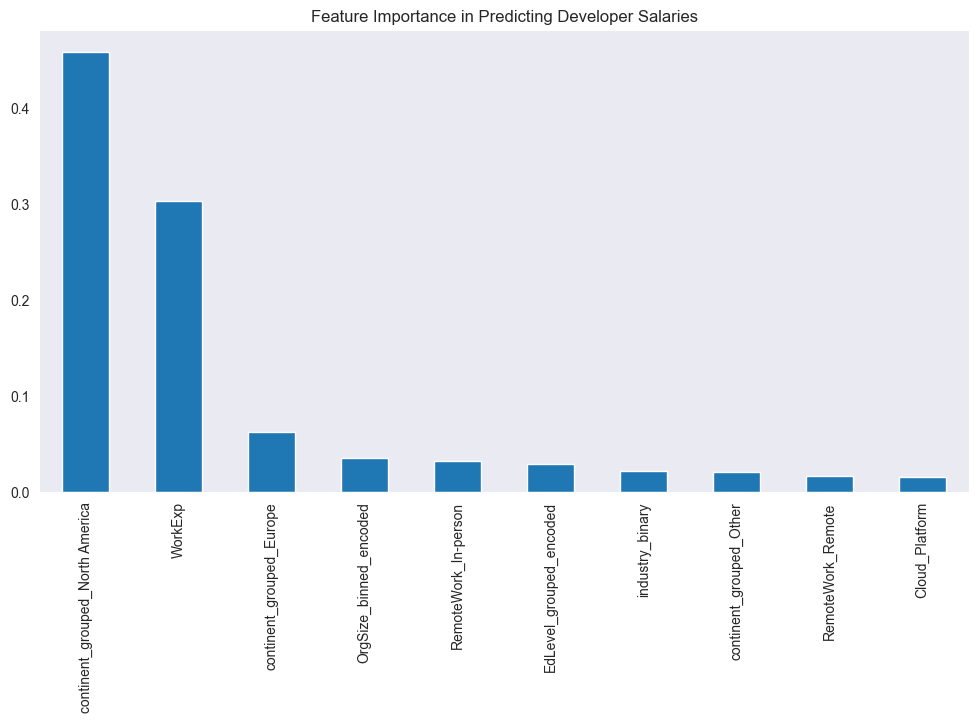

In [63]:
# Feature Importance (Random Forest)
feature_importance = pd.Series(rf.feature_importances_, index=X_rf.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance in Predicting Developer Salaries")
plt.show()

### Key Insights from the Random Forest Model  

- **Continent (North America)** was the most influential variable in the **Random Forest model**, indicating that developers in **North America** tend to earn the highest salaries.  
- **Work Experience** had a significant impact, reinforcing its role as a key factor in determining salary levels.  
- **Europe** was the third most important variable, showing a positive influence on salary, though lower than North America.  
- **Organization Size** ranked as the fourth most influential factor, suggesting that larger organizations may offer higher salaries compared to smaller companies.  
- **Education Level and Cloud Platform experience** had relatively **low importance**, indicating they may have a weaker direct impact on salary compared to other factors.  

### Takeaways:  
- **Geographic location is the strongest salary predictor**, with North America and Europe associated with higher earnings.  
- **Work experience remains a key driver of salary**, particularly in the **Random Forest model**, which captures non-linear relationships.  
- **Larger organizations may offer better salaries**, but the effect is smaller compared to work experience and location.  
- **Education level and cloud platform experience had low influence**, suggesting that formal education may not be as critical for salary as factors like location, experience, and company size.  

### 10. Conclusion & Future Work

### Key Insights:  
1. Both models **struggle to explain salary variation**, with R² values below 0.5, indicating they only capture around 48% tp 49% of the variance in salary. Other unaccounted factors likely play a significant role.  
2. **Random Forest performed marginally better** than Linear Regression, but the difference is small, suggesting both models have limitations in predicting salary accurately.  
3. The relatively high **MAE (~27,000 USD)** in both models indicates substantial prediction errors, meaning the models might not be reliable for precise salary estimation.  
4. **Future work** should explore additional features (e.g., skills, job roles, and industry-specific factors) and potentially more sophisticated modeling techniques such as **Gradient Boosting Machines (GBM) or Neural Networks** to improve prediction accuracy.  
5. **Feature selection and engineering** (e.g., handling multicollinearity) could help refine the models and reduce prediction errors.  
6. **Hyperparameter tuning**, especially for **Random Forest** (e.g., adjusting the number of trees and depth) and applying **K-Fold Cross-Validation**, could enhance model performance.  
7. Other regression techniques like **Ridge, Lasso, or Elastic Net Regression** could be explored to see if they yield better generalization and interpretability. 
8. The **data preparation process** was the most time-consuming and complex step, highlighting the importance of high-quality data preprocessing.  
9. **Fine-tuning** the models using techniques such as **K-Fold Cross-Validation** or **Grid Search** should be the next step to optimize variable selection and hyperparameters for better performance.  


